# Iris Flower Class Predictor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

***Loading the Dataset***

In [2]:
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

In [3]:
df = pd.read_csv('iris.data', header=None, names = column_names)

In [4]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


***Data Cleaning***

In [5]:
# Replace infinite updated data with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df.dropna(inplace=True)

In [6]:
df

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


***Data Visualization***

<AxesSubplot:>

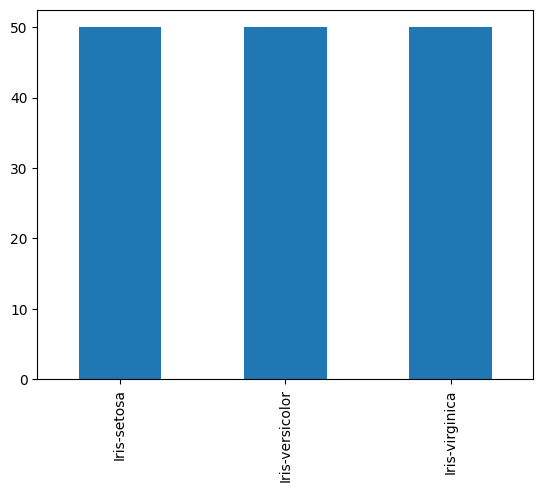

In [9]:
df['class'].value_counts().plot(kind='bar')

We can visulaize the whole dataset by just one plot i-e pairplot by the seaborn module

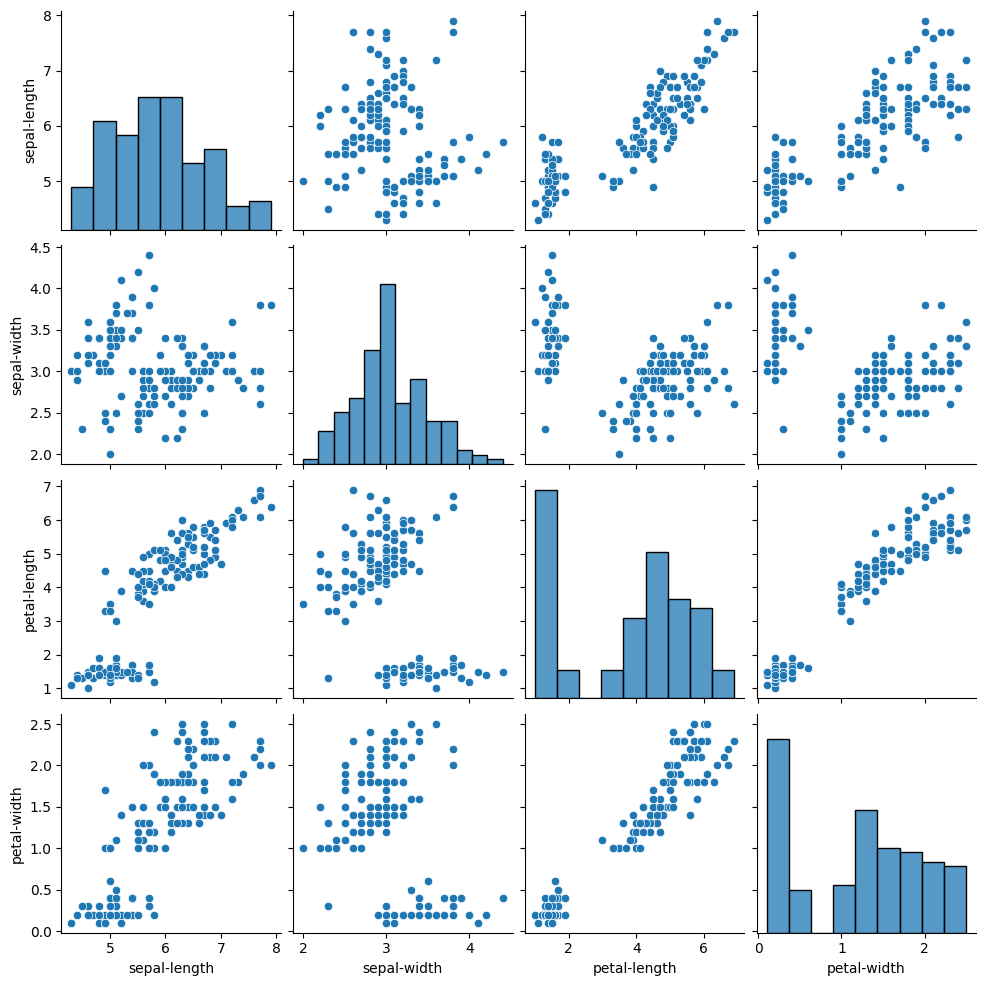

In [10]:
sns.pairplot(df)

# Training Process

For training purpose we have to divide our dataset for training and other for testing part

In [11]:
df['class'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 3], inplace=True)

In [12]:
x_train_df = df.iloc[:,:4]
print(x_train_df)

     sepal-length  sepal-width  petal-length  petal-width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [13]:
y_train_df = df.iloc[:,4]

print(y_train_df)

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: class, Length: 150, dtype: int64


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_train_df, y_train_df, random_state=0)

# Building the Model

I will use Linear regression model from sklearn

In [15]:
reg = LinearRegression()

In [23]:
reg.fit(x_train, y_train)

LinearRegression()

# Predicting the values

In [17]:
y_pred = reg.predict(x_test)

# Evaluating the Model

In [18]:
r2_score = reg.score(x_test,y_test)
print(r2_score)

0.8888472883819633


# Testing the Module

In [21]:
pred = reg.predict(np.array([[6.7, 3.0, 5.2, 2.3], [5.1, 3.5, 1.4, 0.2]]))

In [20]:
for i in pred:
    if i<1:
        print('The species of flower is: '+'Iris_Setosa')
    if i>1 and i<2:
        print('The species of flower is: '+'Iris-versicolor')
    if i>2 and i<3:
        print('The species of flower is: '+'Iris-virginica')

The species of flower is: Iris-virginica
The species of flower is: Iris_Setosa
